# IMPORT LIBRARIES

In [1]:
import pandas as pd                                   # For dataframes
import numpy as np                                    # For various functions
import matplotlib.pyplot as plt                       # For plotting functions
import seaborn as sns                                 # For additional plotting functions

## LOAD THE DATA

In [2]:
df = pd.read_csv('data/divorce_data.csv', sep=';')

- Check the data.

In [3]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


# EXPLORE THE DATA

- Check the totals of the target variable

In [4]:
print('Total number of the people who participated : ' + str(len(df)))

sum_of_divorced = df.Divorce.sum()
print('Total number of the people who\'s divorced : ' + str(sum_of_divorced))


sum_of_notdivorced = len(df) - sum_of_divorced
print('Total number of the people who\'s not divorced : ' + str(sum_of_notdivorced))



Total number of the people who participated : 170
Total number of the people who's divorced : 84
Total number of the people who's not divorced : 86


- Plot the counts

<Axes: xlabel='Divorce', ylabel='count'>

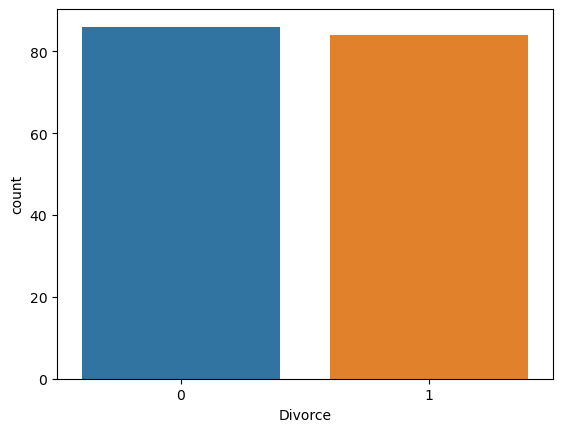

In [5]:
sns.countplot(x = 'Divorce', data = df)

- Take a look at variables standart deviation, mean , max and min etc.

In [6]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


- Select four arbitrary variables and get paired plots of them.

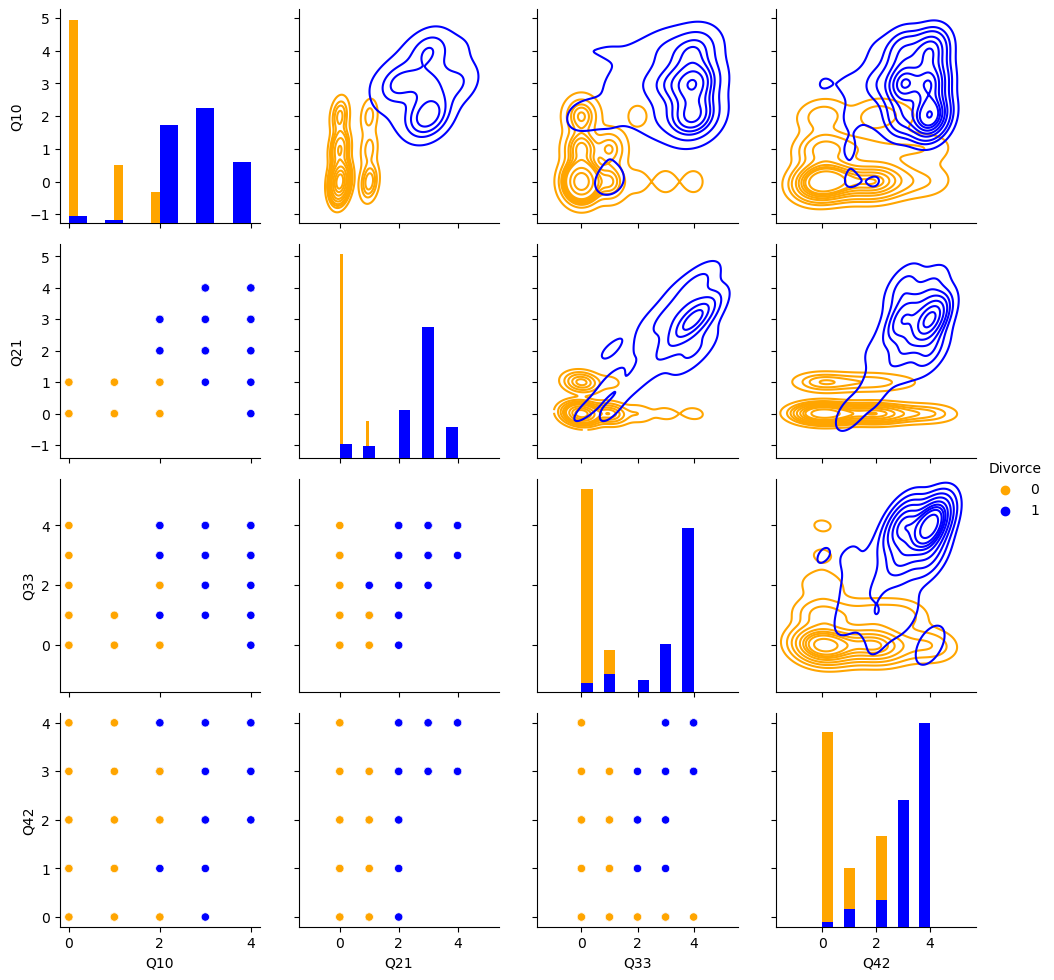

In [7]:
g = sns.PairGrid(
    df,
    vars = ['Q10', 'Q21', 'Q33', 'Q42'],
    hue = 'Divorce',
    diag_sharey = False,
    palette = ['orange', 'blue']
    
)


g.map_diag(plt.hist)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)
g.add_legend(title='Divorce')

- Look at the correlation between features with heatmap.

In [8]:
correlation = df.corr()

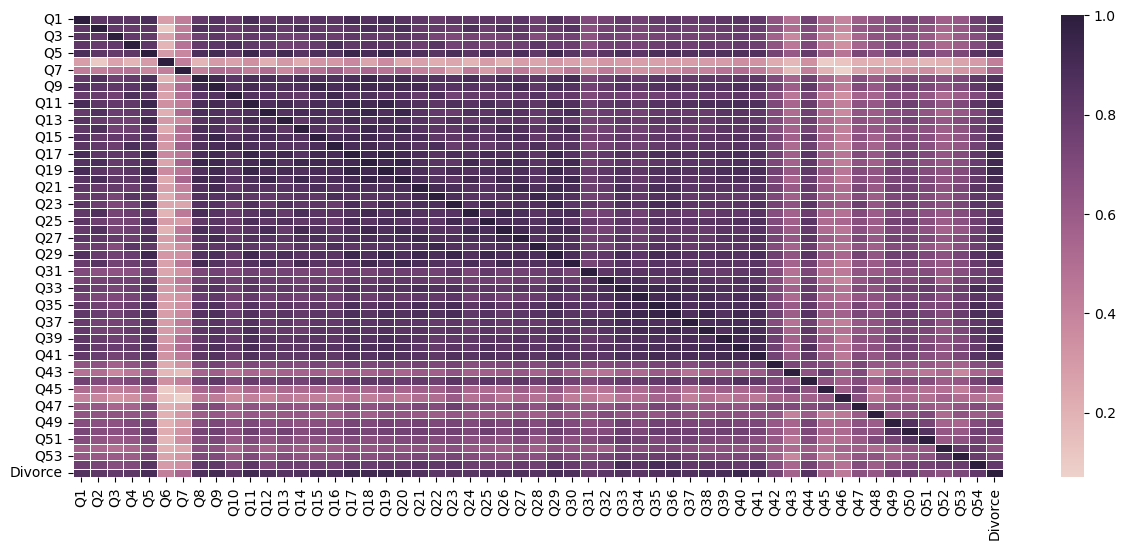

In [9]:
plt.figure(figsize=(15,6)) 
sns.heatmap(correlation,fmt=".5f", linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True)) 
plt.show()